In [1]:
import torch
import torch.nn.functional as F     # 激励函数都在这
import torch.nn as nn
from torch.autograd import Variable   #torch.autograd.Variable（）将张量转换为计算图中的节点

import matplotlib.pyplot as plt

In [2]:
#数据：
x=torch.unsqueeze(torch.linspace(-1,1,100),dim=1)       #创建x，dim为100*1
y=x.pow(2)+0.2*torch.rand(x.size())                     #创建y=x^2，并加入noise
print(x.size())
print(y.size())

torch.Size([100, 1])
torch.Size([100, 1])


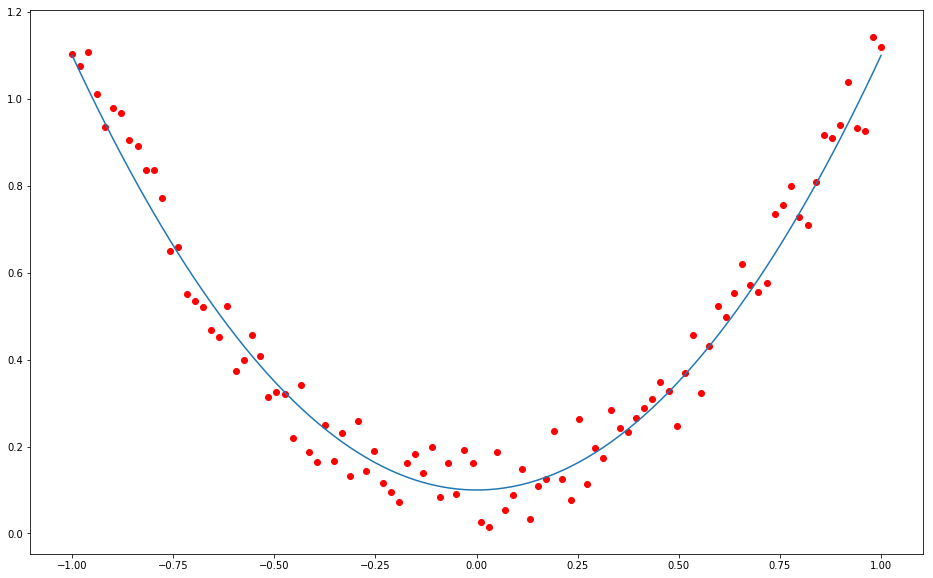

In [3]:
plt.figure(figsize=(16,10))
plt.scatter(x.data.numpy(),y.data.numpy(),c='r')         #转换为numpy.array形式画图，如果不转换有时候会出错
plt.plot(x.data.numpy(),x.data.numpy()**2+0.1)

In [82]:
#定义一个简单的NN，来做regression
class Network(nn.Module):
    def __init__(self,n_features,n_hidden,n_output):
        super(Network,self).__init__()         #表示nerwork的__init__继承了nn.Module的__init__
        self.hidden = nn.Linear(in_features=n_features,out_features=n_hidden)
        self.out = nn.Linear(in_features=n_hidden,out_features=n_output)
    
    def forward(self,x):
        x = F.relu(self.hidden(x))
        x = self.out(x)                              #由于是regression，不需要再对结果激励，也不用多处理，只需要输出即可
        return x

In [83]:
network=Network(1,10,1)
print(network)

Network(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (out): Linear(in_features=10, out_features=1, bias=True)
)


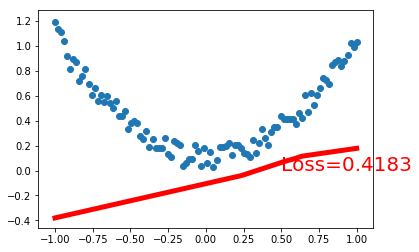

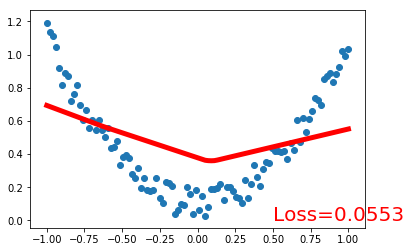

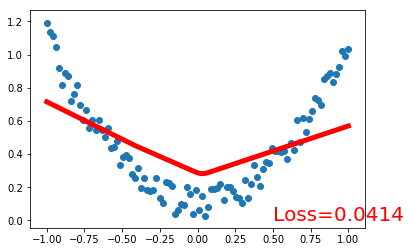

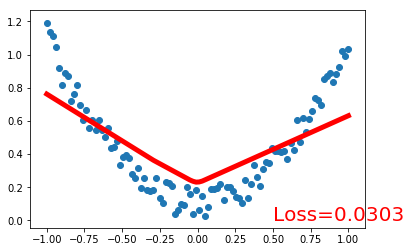

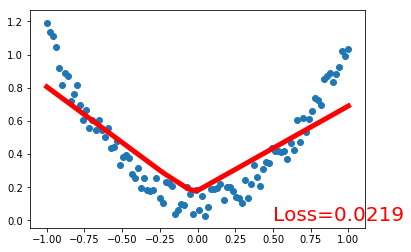

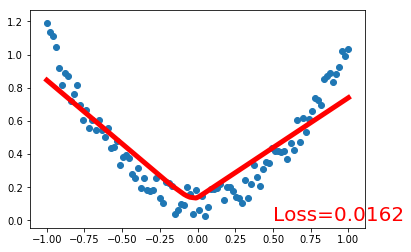

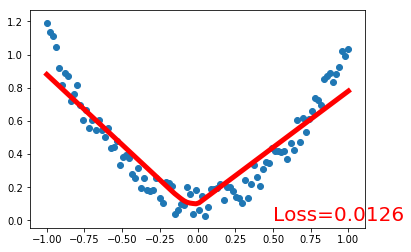

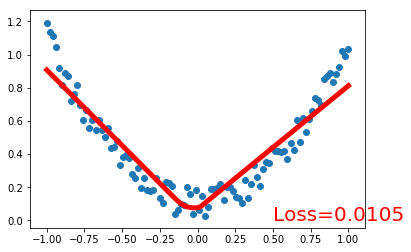

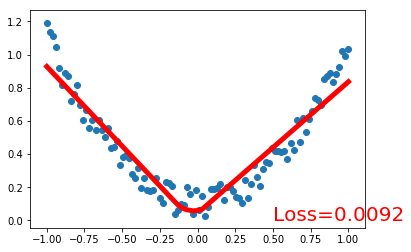

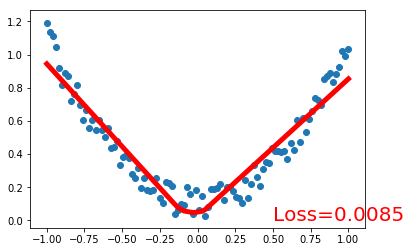

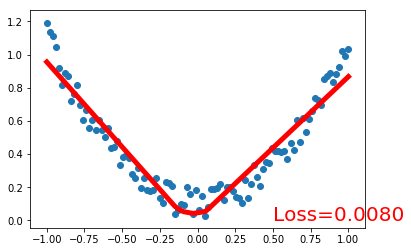

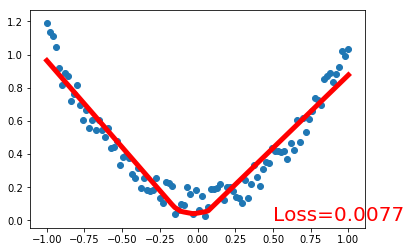

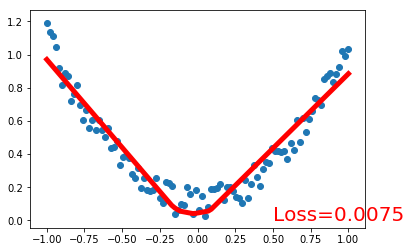

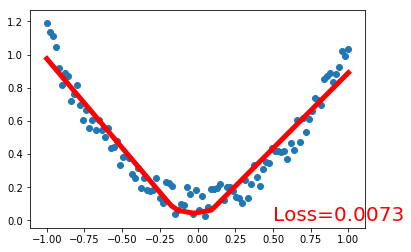

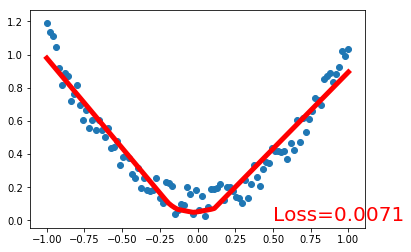

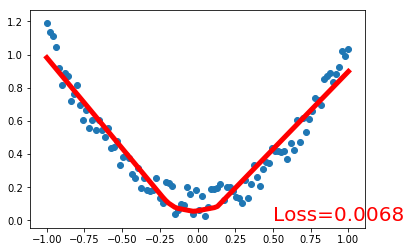

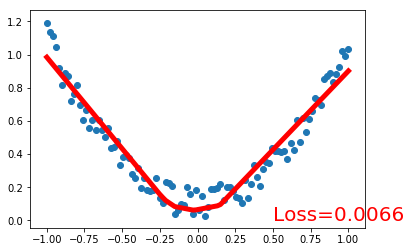

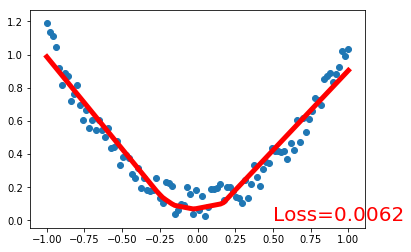

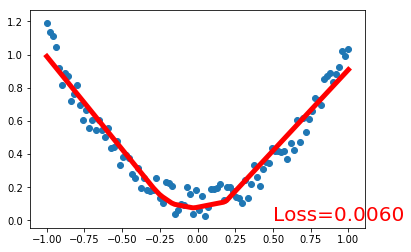

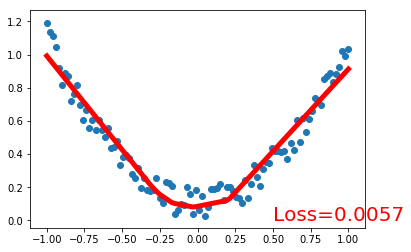

In [84]:
#训练模型：
optimizer=torch.optim.SGD(network.parameters(),lr=0.5)        #这个简单的问题lr=0.5即可
loss_func=nn.MSELoss()                 #用Minilize square error loss来定义loss，多用于回归问题

plt.ion()              #开启图像交互过程，可以显示动态图像，在notebook里面显示不出来，在其他编译器如pycharm可以
plt.show()

for i in range(100):               #把100个数据看做1个batches，然后总共处理100次
    pred=network(x)
    loss=loss_func(pred,y)
    
    optimizer.zero_grad()          #每次都要对这个NN网里的grad清零，以至于上一个batch不影响下一个batch，每次都单独考虑一个batch
                                   #因为pytorch中的grad都是默认累加的。 当然也可以用累加到一定量再清零的办法
    loss.backward()
    optimizer.step()
    
    if i%5 ==0:             #每5个数据显示一个图像
        # plot and show learning process
        plt.cla()             #clear axe，清除当前图片内容，但是不删掉图片，可以继续操作该图片，
                            #还有一些清除操作如plt.clf()清除当前图片及内容,plt.close()清除窗户
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), pred.data.numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 20, 'color':  'red'})  # 0.5,0表示文本的显示坐标
        plt.pause(0.1)      #显示下次图像时要等待0.1s
        
plt.ioff()
plt.show()